In [486]:
!uv pip install numpy pandas matplotlib seaborn --quiet

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [488]:
df = pd.read_csv('cars.csv')

In [489]:
df.shape

(15411, 14)

In [490]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [491]:
df=df.drop(df.columns[0],axis=1)

Data Decritption(Feature Information)¶
1. car_name: Car's Full name, which includes brand and specific model name.
2. brand: Brand Name of the particular car.
3. model: Exact model name of the car of a particular brand.
4. seller_type: Which Type of seller is selling the used car
5. fuel_type: Fuel used in the used car, which was put up on sale.
6. transmission_type: Transmission used in the used car, which was put on sale.
7. vehicle_age: The count of years since car was bought.
8. mileage: It is the number of kilometer the car runs per litre.
9. engine: It is the engine capacity in cc(cubic centimeters)
10. max_power: Max power it produces in BHP.
11. seats: Total number of seats in car.
12. selling_price: The sale price which was put up on website.

In [492]:
# top cars sold on cars dekho
df.car_name.value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [493]:
numerical_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns

In [494]:
categorical_features

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [495]:
df['seller_type'].value_counts(normalize=True)

seller_type
Dealer              0.618973
Individual          0.369801
Trustmark Dealer    0.011226
Name: proportion, dtype: float64

In [496]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia  

 Univariate Analysis: Numerical Features

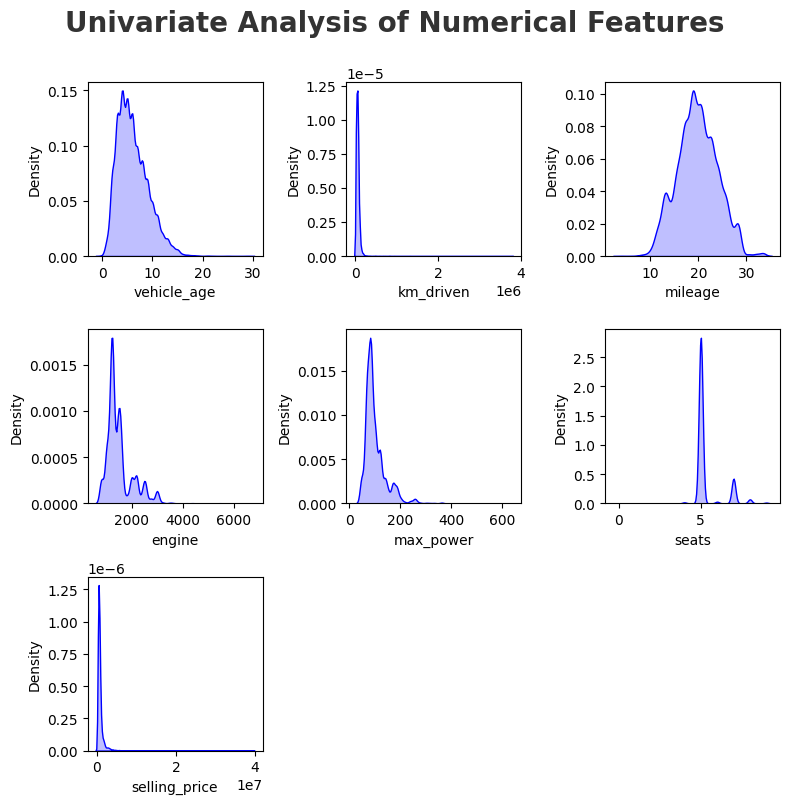

In [497]:
plt.figure(figsize=(8,8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],fill=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

1. Vehicle age - moderately right skewed
2. mileage - almost bell shaped
3. km_driven - heavyily right skewed
4. engine - most engines at lower engine capacities
5. max_power - right tail
6. selling_price - heavily right skewed

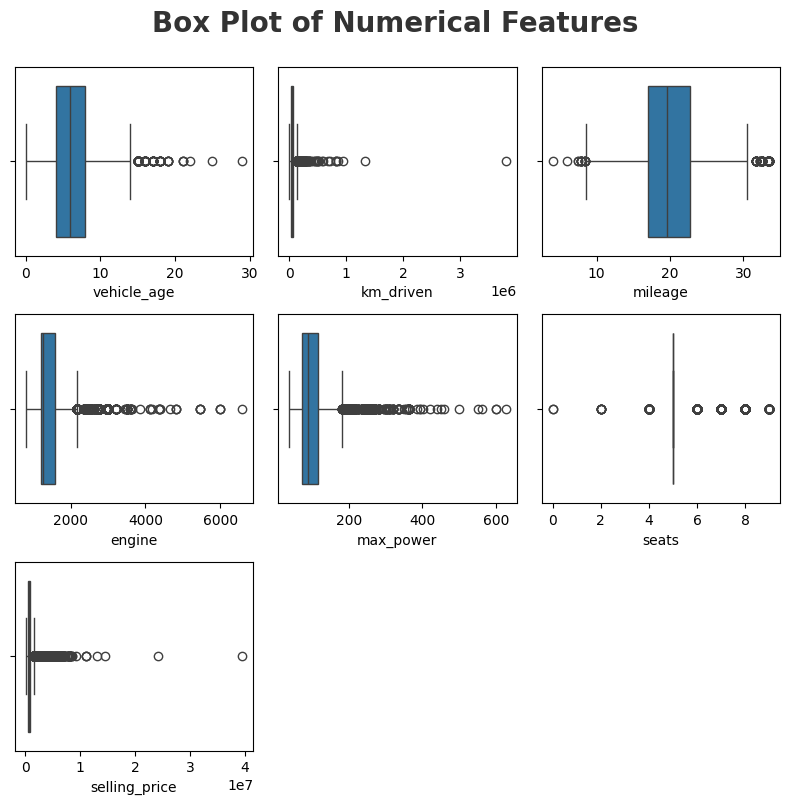

In [498]:
plt.figure(figsize=(8,8))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

outliers in km_driven, max_power, engine, selling_price features have outliers

Univariate: Categorical Features

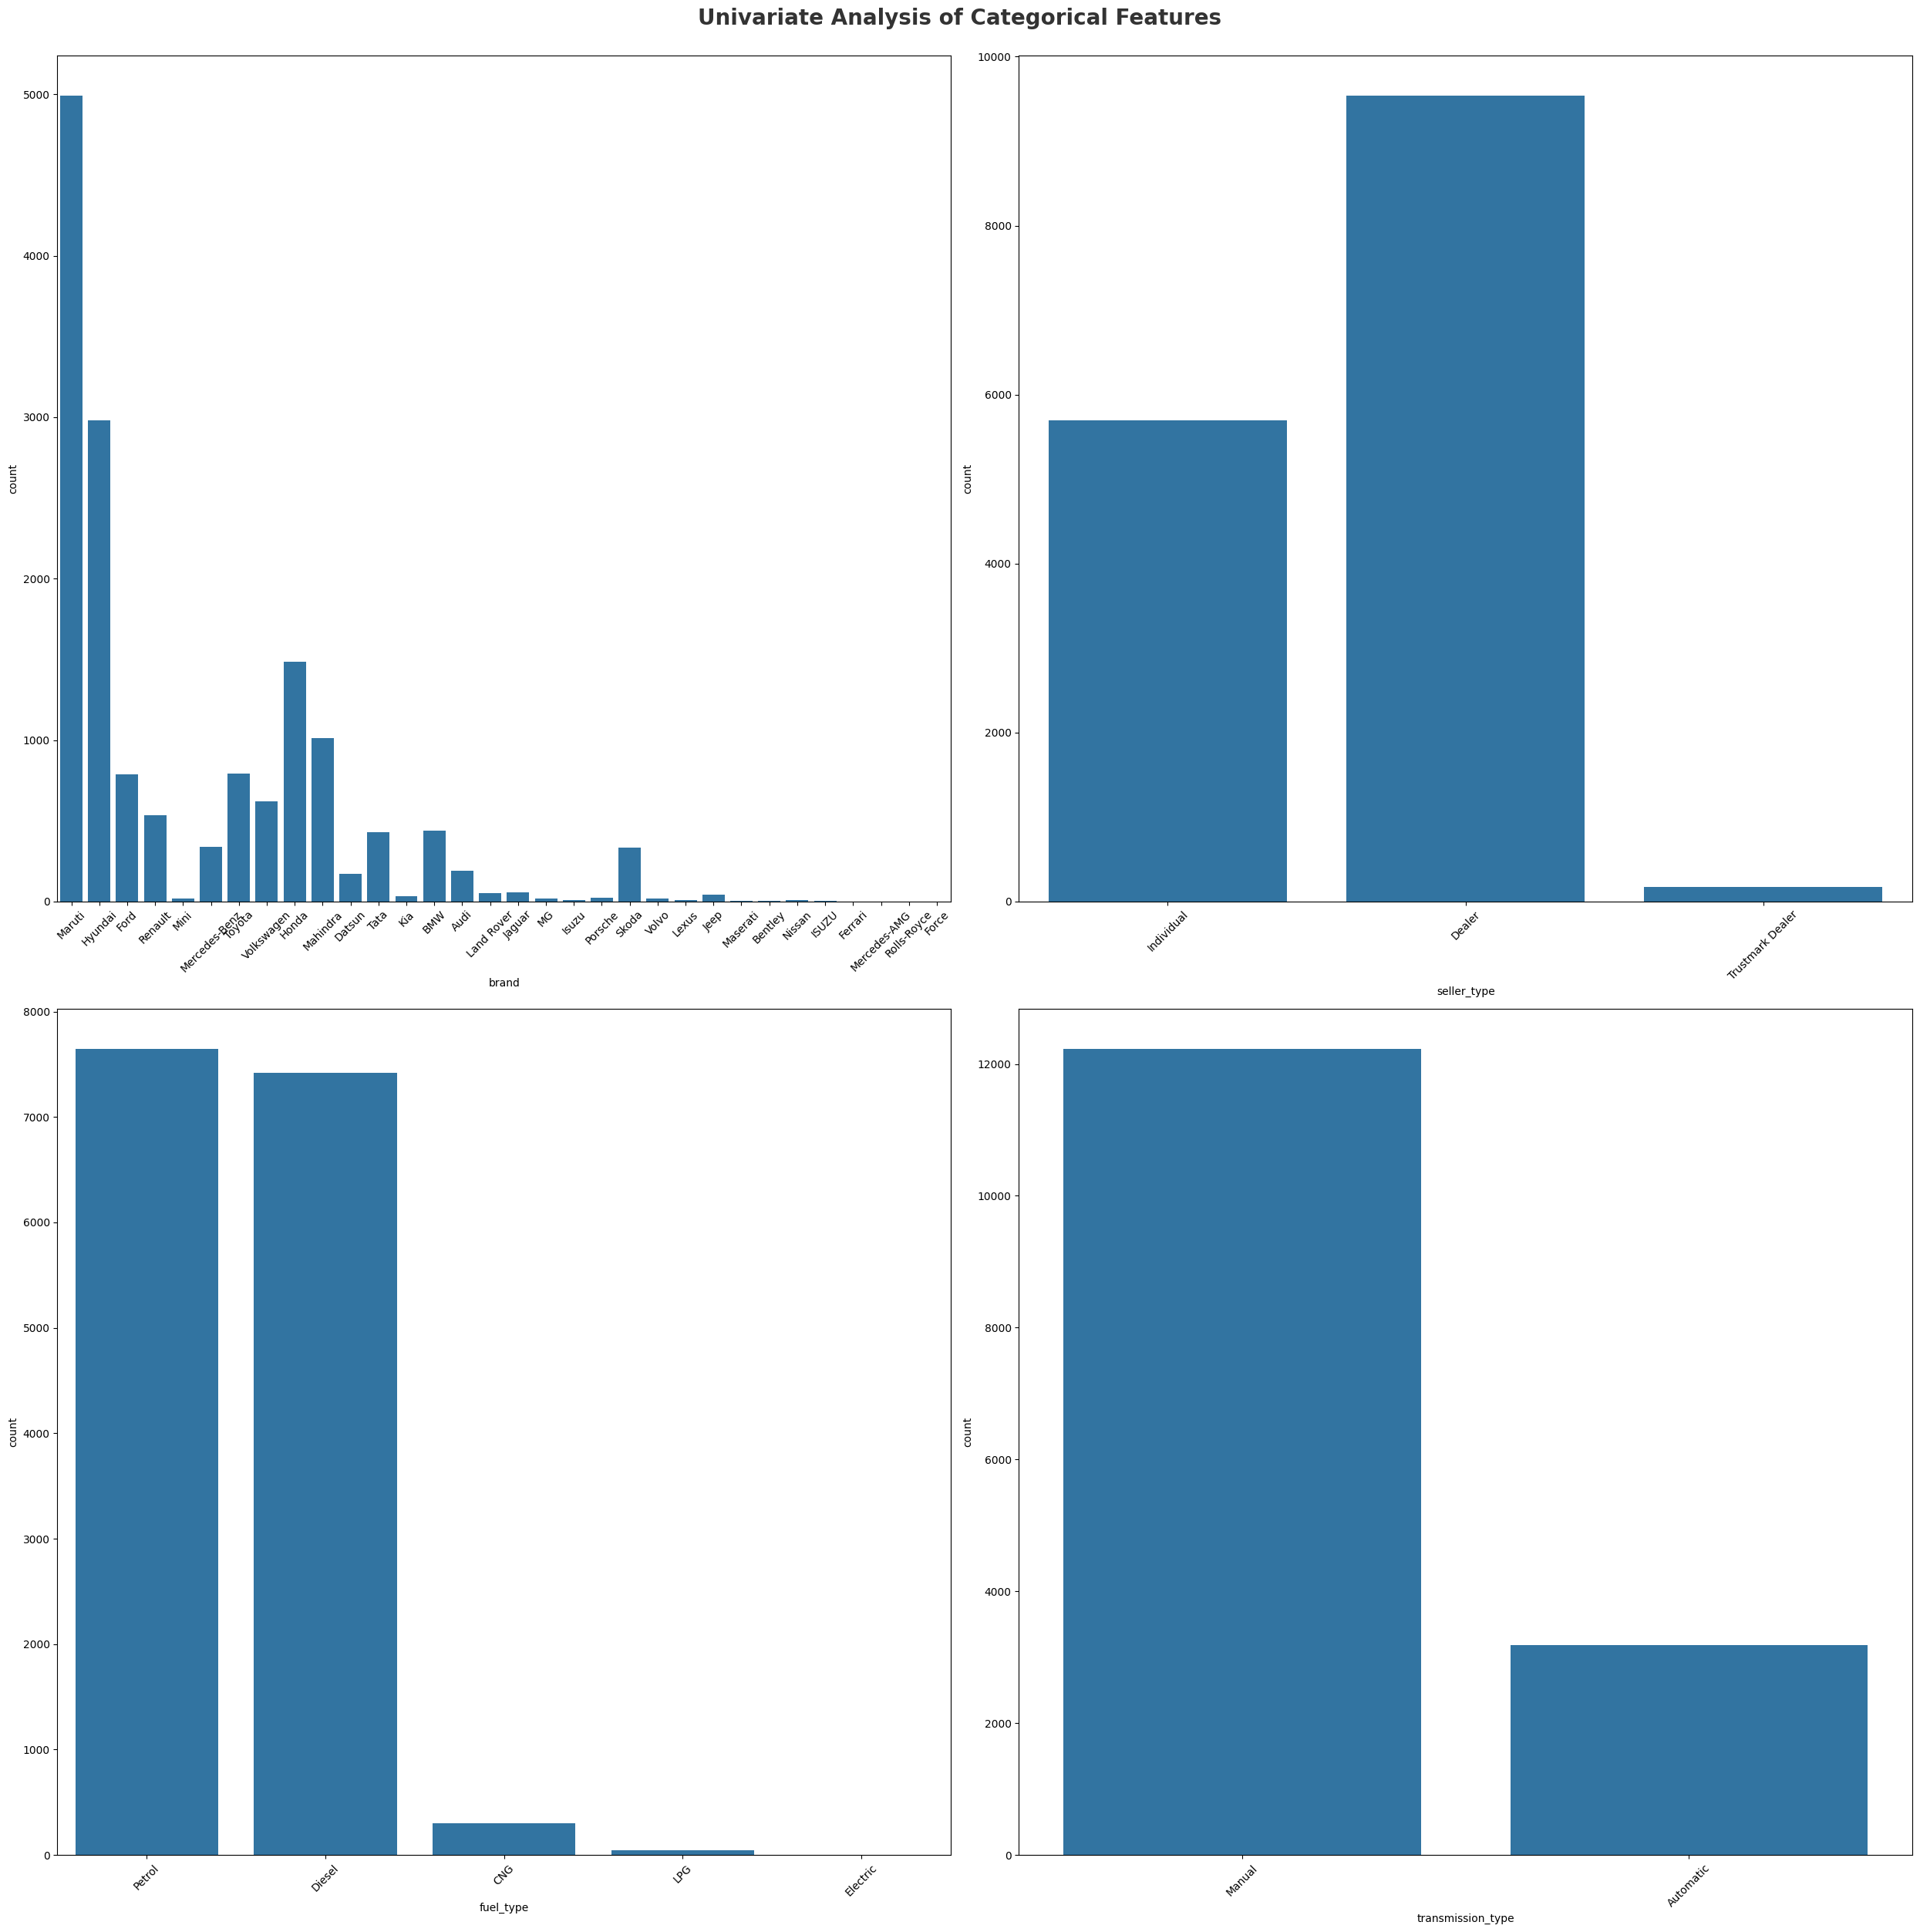

In [499]:
plt.figure(figsize=(25,25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Bivariate Analysis : Numerical

In [500]:
continuous_features=[feature for feature in numerical_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


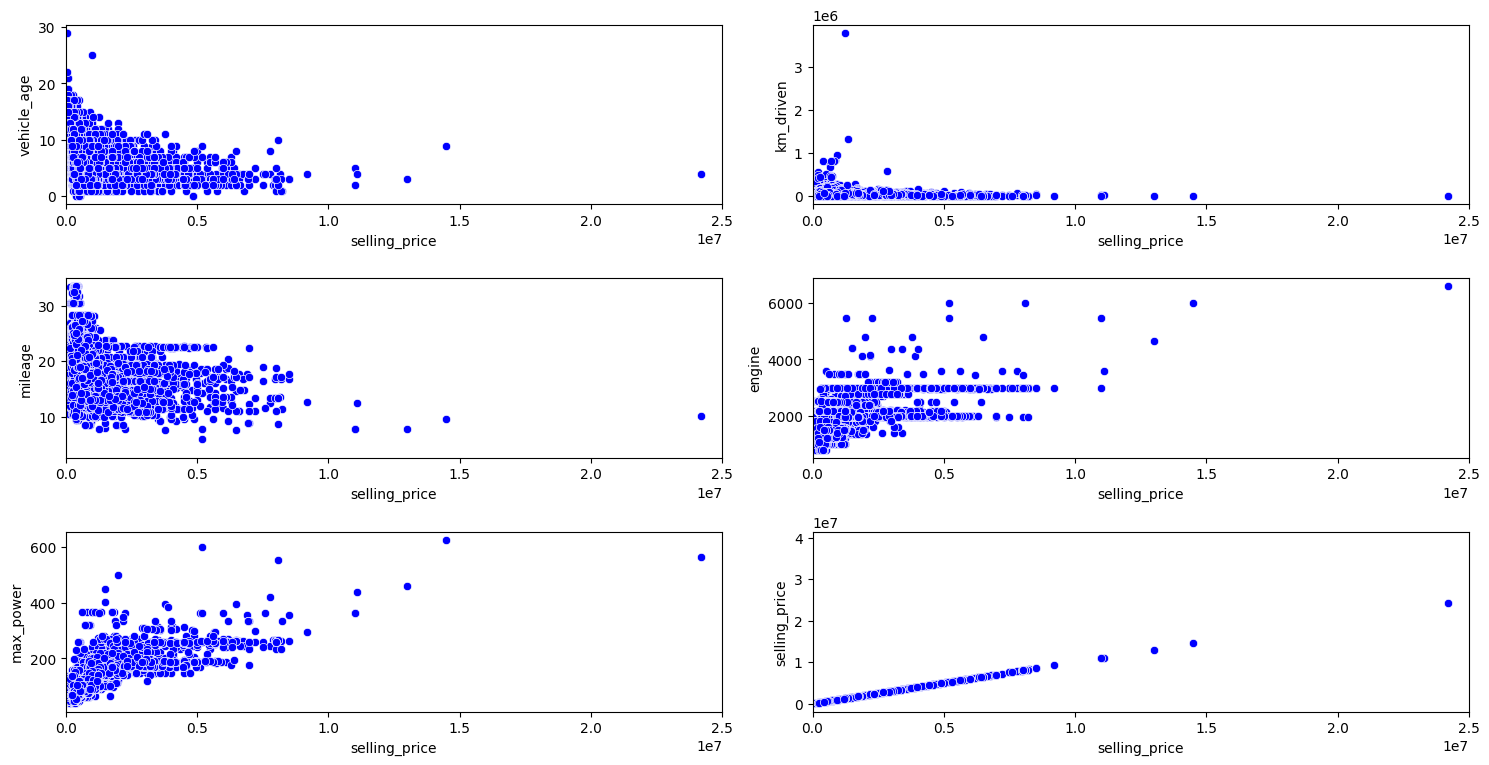

In [501]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

Multivariate analysis

In [502]:
df[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


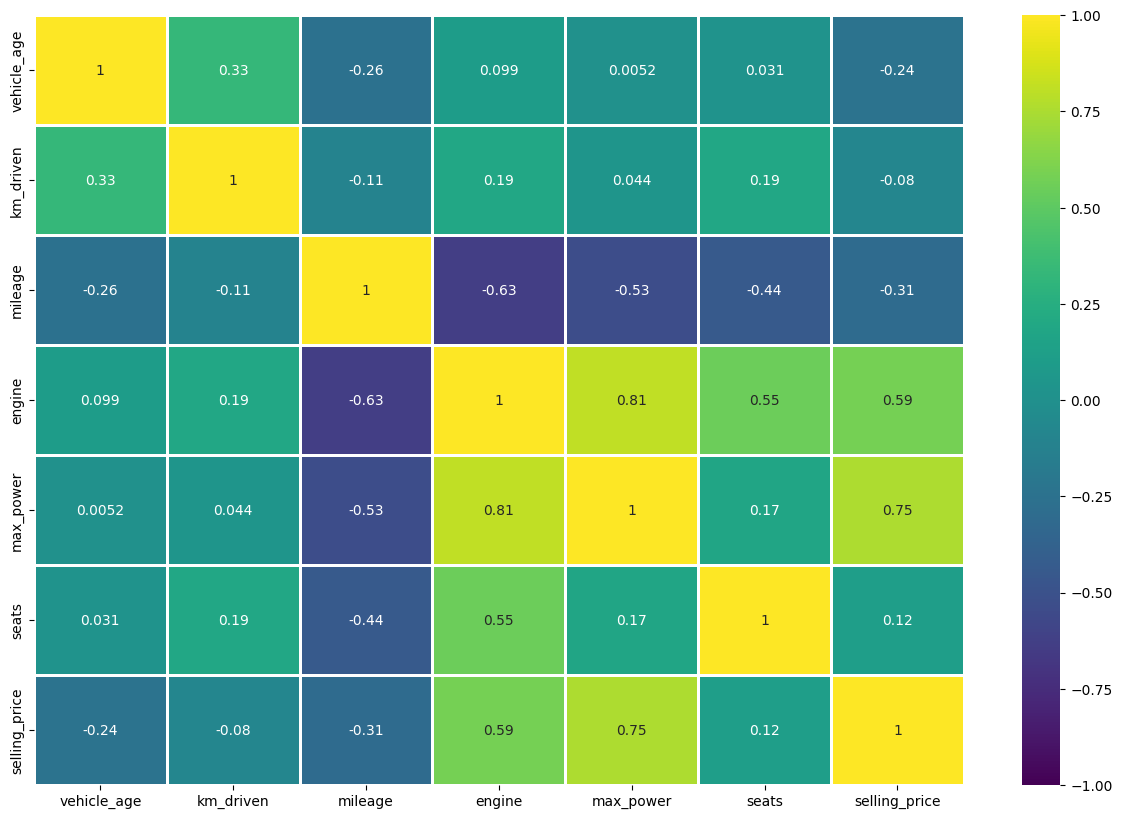

In [503]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numerical_features].corr(), annot= True, vmin= -1 ,cmap=sns.color_palette("viridis", as_cmap=True)
, vmax= 1, linecolor='white', linewidths=2)
plt.show()

Categorical variables

In [504]:
categorical_features

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

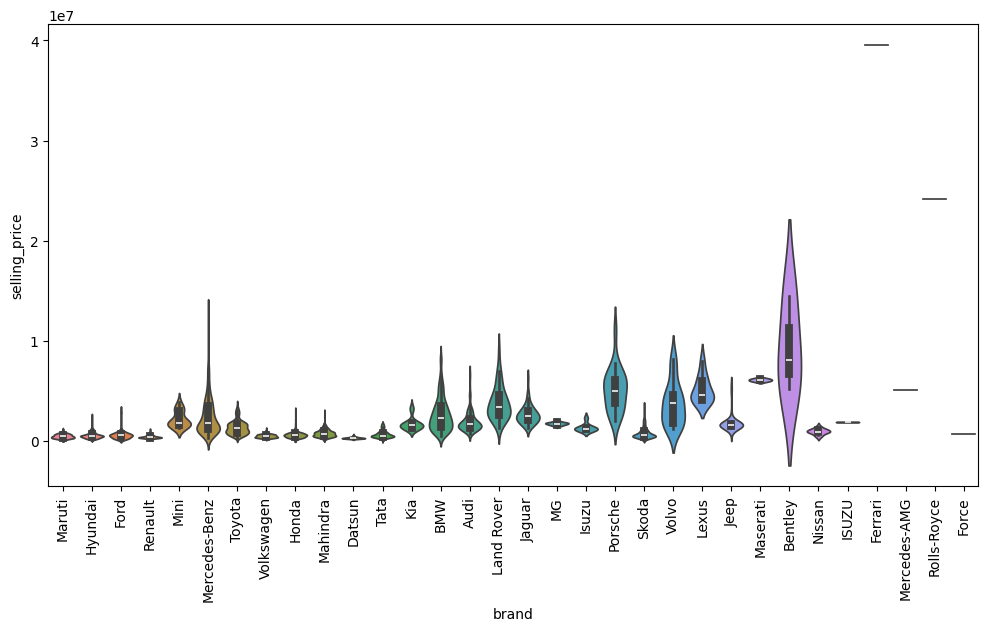

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.violinplot(x='brand', y='selling_price', data=df,hue='brand')
plt.xticks(rotation=90)
plt.show()


brand has strong correlation with selling_price

Brand is useless for the benefit of customer

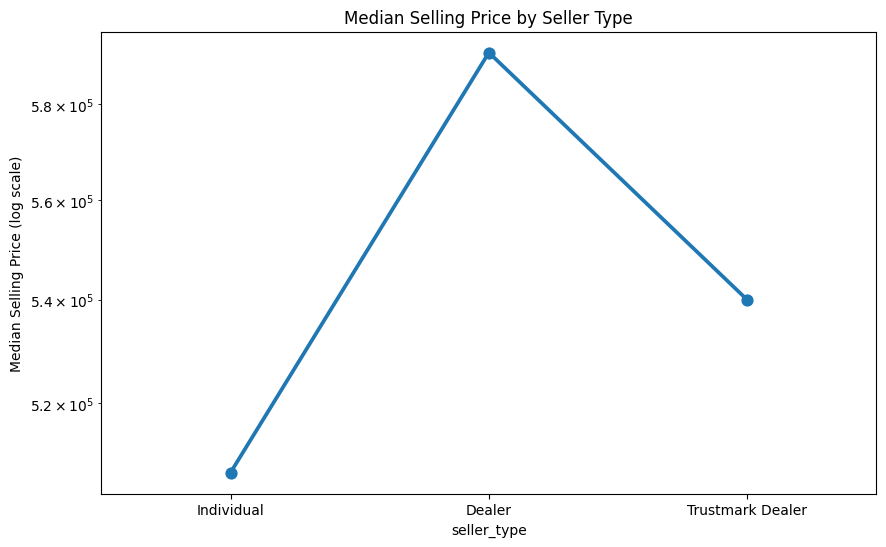

In [506]:
plt.figure(figsize=(10,6))
sns.pointplot(
    x='seller_type',
    y='selling_price',
    data=df,
    estimator='median',
    errorbar=None
)
plt.yscale('log')
plt.ylabel('Median Selling Price (log scale)')
plt.title('Median Selling Price by Seller Type')
plt.show()


Vehcle cost depends on the type of seller

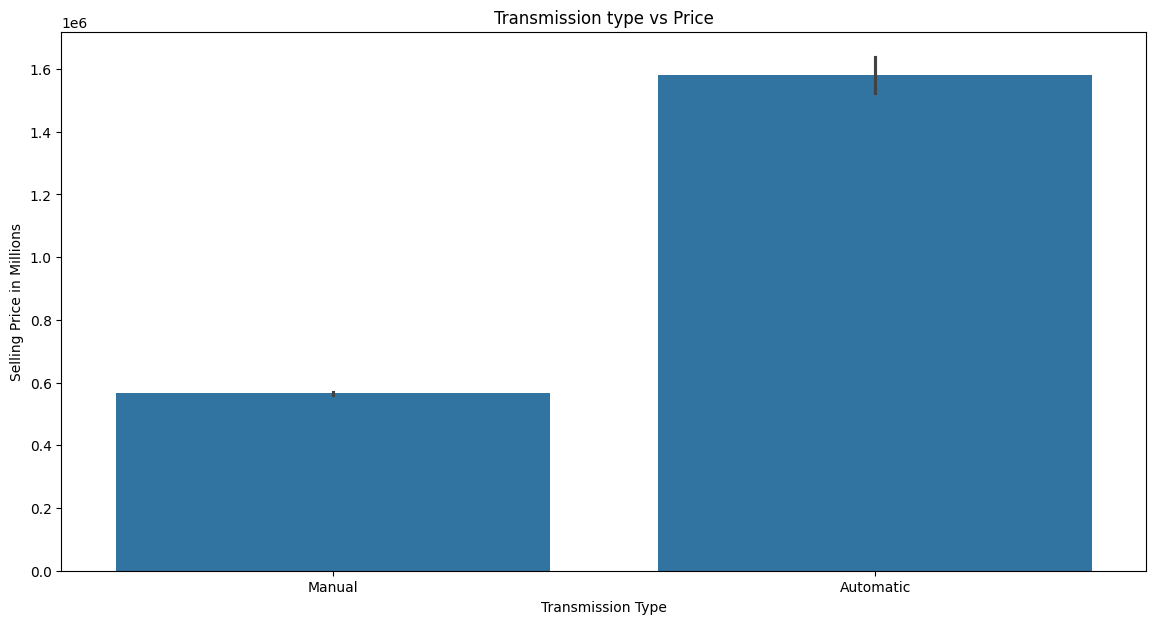

In [507]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df)
plt.title("Transmission type vs Price")
plt.ylabel("Selling Price in Millions")
plt.xlabel("Transmission Type")
plt.show()

Automatic cars have more selling price

Data Engineering

In [508]:
cars = df.copy()

In [509]:
cars = cars.drop(columns=['car_name','model','brand'],axis=1)

In [510]:
categorical_features = cars.select_dtypes('object')

In [511]:
cars = cars.drop(labels=['seller_type','fuel_type','transmission_type'],axis=1)

In [512]:
dummy = pd.get_dummies(categorical_features,dtype=float)

In [513]:
final_cars = pd.concat([cars,dummy],axis=1)

In [514]:
final_cars

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [515]:
final_cars.to_csv('preprocessed_cars.csv')

In [516]:
X=final_cars.drop('selling_price',axis=1)
y=final_cars['selling_price']

In [517]:
y_log = np.log(y)


In [518]:
y_log

0        11.695247
1        13.217674
2        12.278393
3        12.328290
4        13.253392
           ...    
15406    12.429216
15407    13.737549
15408    12.959844
15409    14.018451
15410    13.997832
Name: selling_price, Length: 15411, dtype: float64

In [519]:
X_scaled = X.copy()

In [520]:
for col in X.columns:
    X_scaled[col] = (X[col] - X[col].mean()) / X[col].std()


In [521]:
X_scaled.shape

(15411, 16)

# Linear regression model

In [522]:
def compute_model_output(x,w,b):
  """
  x : Data (m,n) Data with m examples and n features
  w,b (scalar) Model parameters
  y : Data(m) target values
  """

  return np.dot(x , w) + b

In [523]:
compute_model_output(X,0,0).shape

(15411, 16)

In [524]:
def compute_cost(x,y,w,b):
  """
  x : Data (m,n) Data with m examples and n features
  w,b (scalar) Model parameters
  y : Data(m) target values
  """
  m,n = x.shape[0] , x.shape[1]
  y_pred = compute_model_output(x,w,b)
  cost = (np.sum((y_pred-y)**2)) / (2*m)

  return cost

In [525]:
# My favourite
def compute_gradient(x,y,w,b):
  m,n = x.shape[0] , x.shape[1]
  y_pred = compute_model_output(x,w,b)
  error = y_pred - y
  dj_dw = (np.dot(x.T,error)) / m
  dj_db = np.sum(error) / m
  return dj_dw, dj_db

In [526]:
import numpy as np
import copy
import math

def gradient_descent(x, y, w_in, b_in, alpha, num_iters,
                     cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = b_in

    J_history = []
    p_history = []

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 1000==0:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w.copy(), b])
            print(
                f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, "
                f"dj_dw norm {np.linalg.norm(dj_dw):0.3e}, "
                f"dj_db {dj_db:0.3e}, "
                f"b {b:0.5e}"
            )

    return w, b, J_history, p_history


In [527]:
def compute_mean_squared_error(x,y,y_pred):
  m = x.shape[0]
  return (np.sum(y-y_pred)**2)/m

In [528]:
f_w,f_b,uno,duo = gradient_descent(X_scaled.values,y_log.values,w_in=np.zeros(16),b_in=np.mean(y_log.values),alpha=0.00001,num_iters=150000,cost_function=compute_cost,gradient_function=compute_gradient)

Iteration    0: Cost 2.36e-01, dj_dw norm 1.031e+00, dj_db 1.986e-15, b 1.32796e+01
Iteration 1000: Cost 2.26e-01, dj_dw norm 9.982e-01, dj_db 1.984e-15, b 1.32796e+01
Iteration 2000: Cost 2.16e-01, dj_dw norm 9.669e-01, dj_db 1.991e-15, b 1.32796e+01
Iteration 3000: Cost 2.07e-01, dj_dw norm 9.367e-01, dj_db 1.995e-15, b 1.32796e+01
Iteration 4000: Cost 1.98e-01, dj_dw norm 9.076e-01, dj_db 2.002e-15, b 1.32796e+01
Iteration 5000: Cost 1.90e-01, dj_dw norm 8.796e-01, dj_db 1.999e-15, b 1.32796e+01
Iteration 6000: Cost 1.83e-01, dj_dw norm 8.527e-01, dj_db 2.011e-15, b 1.32796e+01
Iteration 7000: Cost 1.76e-01, dj_dw norm 8.267e-01, dj_db 2.004e-15, b 1.32796e+01
Iteration 8000: Cost 1.69e-01, dj_dw norm 8.017e-01, dj_db 2.004e-15, b 1.32796e+01
Iteration 9000: Cost 1.63e-01, dj_dw norm 7.776e-01, dj_db 2.001e-15, b 1.32796e+01
Iteration 10000: Cost 1.57e-01, dj_dw norm 7.544e-01, dj_db 2.011e-15, b 1.32796e+01
Iteration 11000: Cost 1.52e-01, dj_dw norm 7.320e-01, dj_db 2.016e-15, b 1.

In [529]:
y_pred_log = compute_model_output(X_scaled.values, f_w, f_b)
y_pred = np.exp(y_pred_log)

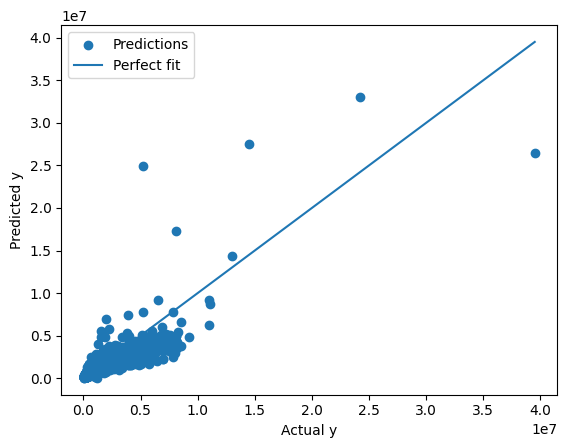

In [530]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# Scatter of actual vs predicted
plt.scatter(y, y_pred, label="Predictions")

# Straight reference line (perfect prediction)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

plt.plot([min_val, max_val],
         [min_val, max_val],
         label="Perfect fit")

plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.legend()
plt.show()


In [531]:
y_pred

array([ 205140.30112985,  424514.80672593,  246078.24140446, ...,
        644182.48470168,   37454.5667189 , 1136737.71368064],
      shape=(15411,))

In [532]:
print("y range:", y.min(), y.max())
print("y_pred range:", y_pred.min(), y_pred.max())


y range: 40000 39500000
y_pred range: 37454.5667189042 32985246.374995273


In [533]:
print("y_pred_log stats:")
print("min:", y_pred_log.min())
print("max:", y_pred_log.max())

print("w norm:", np.linalg.norm(f_w))
print("b:", f_b)


y_pred_log stats:
min: 10.530883923270865
max: 17.3115709399153
w norm: 0.3989657875155764
b: 13.279562876562442


In [534]:
print("X_scaled shape:", X_scaled.shape)

X_scaled shape: (15411, 16)
